In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Препроцессинг

## Мердж данных

In [2]:
def read_table(tablename):
    return pd.read_csv(f"dump/{tablename}_202403271617.csv")

def join_by(df1, df2, key1, key2):
    return df1.set_index(key1).join(df2.set_index(key2))

Считывание данных

In [195]:
tasks_df = read_table("tasks")
transitions_df = read_table("task_transitions")
users_df = read_table("users")
service_object_task_df = read_table("service_object_task")
service_objects_df = read_table("service_objects")
places_df = read_table("places")
accounts_df = read_table("accounts")

Берём нужные фичи

In [196]:
tasks_df = tasks_df[["id", "account_id", "taskable_type", "created_at", "deadline_at", "assigner_id"]]
transitions_df = transitions_df[["id", "task_id", "task_stage_id", "transitioned_at"]]
service_objects_df = service_objects_df[["id", "object_type_id", "place_id"]]

Делаем таблицу со всеми данными

In [197]:
transitions_df["transition_id"] = transitions_df["id"]
transitions_df = transitions_df.drop("id", axis=1)

service_objects_df["service_objects_id"] = service_objects_df["id"]
service_objects_df = service_objects_df.drop("id", axis=1)

places_df = places_df[["region_id", "district_id", "id"]]
places_df["place_id"] = places_df["id"]
places_df = places_df.drop("id", axis=1)

In [198]:
task_transitions_df = tasks_df.set_index("id").join(transitions_df.set_index("task_id"))
task_transitions_df["task_id"] = task_transitions_df.index

task_transitions_df = task_transitions_df.set_index("task_id")

In [199]:
taskable_type_to_id = {'App\\Models\\ServiceDesk\\Incident': 1,
                       'App\\Models\\ServiceDesk\\Regular': 2,
                       'App\\Models\\ServiceDesk\\Assignment': 3,
                       'App\\Models\\ServiceDesk\\Reclamation': 4}

task_transitions_df["taskable_type"] = task_transitions_df["taskable_type"].apply(lambda x: taskable_type_to_id[x])

task_transitions_df = task_transitions_df.join(service_object_task_df.set_index("task_id"))

In [200]:
task_transitions_df["service_objects_id_copy"] = task_transitions_df["service_object_id"]
task_transitions_df["task_id"] = task_transitions_df.index
task_transitions_df = task_transitions_df.set_index("service_objects_id_copy").join(service_objects_df.set_index("service_objects_id")).set_index("task_id")

In [201]:
task_transitions_df["task_id"] = task_transitions_df.index
task_transitions_df["place_id_copy"] = task_transitions_df["place_id"]
task_transitions_df = task_transitions_df.set_index("place_id_copy").join(places_df.set_index("place_id")).set_index("task_id")

In [202]:
task_transitions_df.to_csv("merged_df.csv")

## Изменение типов

In [26]:
merged_df = pd.read_csv("../../merged_df.csv")
merged_df = merged_df.set_index("task_id")

In [27]:
merged_df = merged_df.dropna()
merged_df

,account_id,taskable_type,created_at,deadline_at,assigner_id,task_stage_id,transitioned_at,transition_id,service_object_id,object_type_id,place_id,region_id,district_id
task_id,,,,,,,,,,,,,
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,1.0,2021-07-19 02:52:49,1.0,7.0,1.0,5.0,1.0,2.0
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,2.0,2021-07-20 18:20:37,2.0,7.0,1.0,5.0,1.0,2.0
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,3.0,2021-07-20 18:22:07,3.0,7.0,1.0,5.0,1.0,2.0
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,1.0,2021-07-21 05:49:53,4.0,7.0,1.0,5.0,1.0,2.0
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,2.0,2021-07-23 11:15:59,5.0,7.0,1.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72668,2,1,2024-03-25 14:27:04,2024-03-30 21:00:00,210,16.0,2024-03-25 17:27:04,288403.0,4926.0,9.0,2657.0,5.0,133.0
72668,2,1,2024-03-25 14:27:04,2024-03-30 21:00:00,210,21.0,2024-03-25 17:29:21,288413.0,4926.0,9.0,2657.0,5.0,133.0
72671,1,3,2024-03-25 14:28:44,2024-03-24 21:00:00,162,8.0,2024-03-25 17:28:44,288411.0,9210.0,8.0,5114.0,1.0,1.0


In [28]:
merged_df["task_stage_id"] = merged_df["task_stage_id"].astype('int')
merged_df["transition_id"] = merged_df["transition_id"].astype('int')
merged_df["service_object_id"] = merged_df["service_object_id"].astype('int')
merged_df["object_type_id"] = merged_df["object_type_id"].astype('int')
merged_df["place_id"] = merged_df["place_id"].astype('int')
merged_df["region_id"] = merged_df["region_id"].astype('int')
merged_df["district_id"] = merged_df["district_id"].astype('int')


In [29]:
merged_df

,account_id,taskable_type,created_at,deadline_at,assigner_id,task_stage_id,transitioned_at,transition_id,service_object_id,object_type_id,place_id,region_id,district_id
task_id,,,,,,,,,,,,,
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,1,2021-07-19 02:52:49,1,7,1,5,1,2
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,2,2021-07-20 18:20:37,2,7,1,5,1,2
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,3,2021-07-20 18:22:07,3,7,1,5,1,2
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,1,2021-07-21 05:49:53,4,7,1,5,1,2
1,1,1,2021-07-19 02:52:49,2021-07-19 21:00:00,3,2,2021-07-23 11:15:59,5,7,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72668,2,1,2024-03-25 14:27:04,2024-03-30 21:00:00,210,16,2024-03-25 17:27:04,288403,4926,9,2657,5,133
72668,2,1,2024-03-25 14:27:04,2024-03-30 21:00:00,210,21,2024-03-25 17:29:21,288413,4926,9,2657,5,133
72671,1,3,2024-03-25 14:28:44,2024-03-24 21:00:00,162,8,2024-03-25 17:28:44,288411,9210,8,5114,1,1


In [30]:
dataformat = "%Y-%m-%d %H:%M:%S"
str_date = "2021-07-19 02:52:49"

to_dt = lambda x: datetime.datetime.strptime(x, dataformat)

merged_df["created_at"] = merged_df["created_at"].apply(to_dt)
merged_df["deadline_at"] = merged_df["deadline_at"].apply(to_dt)
merged_df["transitioned_at"] = merged_df["transitioned_at"].apply(to_dt)


In [32]:
merged_df.to_csv("preprocessed_df.csv")

In [37]:
preprocessed_df = pd.read_csv("preprocessed_df.csv")
preprocessed_df = preprocessed_df.set_index("task_id")


# Оценки

In [61]:
preprocessed_df["deadline_at"]

task_id
1        2021-07-19 21:00:00
1        2021-07-19 21:00:00
1        2021-07-19 21:00:00
1        2021-07-19 21:00:00
1        2021-07-19 21:00:00
                ...         
72668    2024-03-30 21:00:00
72668    2024-03-30 21:00:00
72671    2024-03-24 21:00:00
72671    2024-03-24 21:00:00
72671    2024-03-24 21:00:00
Name: deadline_at, Length: 291613, dtype: object

## Своевременность

In [ ]:
def metric_1(df):
    

## Регулярность

## Скорость

# Анал лиз

In [45]:
wout_data = preprocessed_df.drop(columns=["created_at", "deadline_at", "transitioned_at"])

<Axes: >

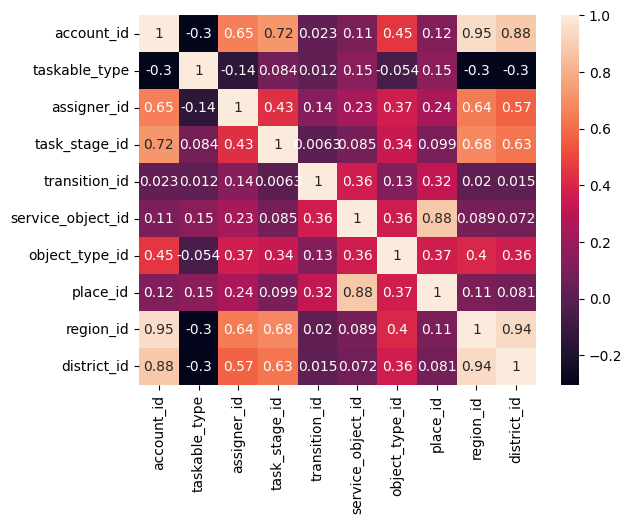

In [46]:
sns.heatmap(wout_data.corr(), annot=True)